# Welcome to pystardog

Press the Restart & Run All button to run all the cells in this notebook and view the output.

In [1]:
import io
import stardog
import pandas as pd
import seaborn as sns

## Specify Stardog connection details

In [2]:
connection_details = {
  'endpoint': 'http://localhost:5820',
  'username': 'admin',
  'password': 'admin'
}

## Create a new database in Stardog

Drop the database if it already exists.

In [3]:
database_name = 'pystardog-tutorial'

with stardog.Admin(**connection_details) as admin:
    if database_name in [db.name for db in admin.databases()]:
        admin.database(database_name).drop()
    db = admin.new_database(database_name)

## Connect to the Stardog database

In [4]:
conn = stardog.Connection(database_name, **connection_details)

## Load the sample data
### Start a transaction

In [5]:
conn.begin()

'af4bb544-1004-4f73-931e-dc8dd73dab6e'

### Add the database schema and data

Download the files to the same directory as this notebook.

[Schema](https://github.com/stardog-union/stardog-tutorials/raw/master/music/music_schema.ttl)

[Data](https://github.com/stardog-union/stardog-tutorials/raw/master/music/music.ttl.gz)

In [6]:
conn.add(stardog.content.File('music_schema.ttl'))

In [7]:
conn.add(stardog.content.File('music.ttl.gz'))

In [8]:
conn.commit() # commit the transaction

## Query the database

This query returns the date the album was released for each album in the database.

In [9]:
query = """
SELECT ?date WHERE {
  ?s a <http://stardog.com/tutorial/Album> ;
    <http://stardog.com/tutorial/date> ?date .
}
"""

csv_results = conn.select(query, content_type='text/csv')
df = pd.read_csv(io.BytesIO(csv_results))
df.head()

,date
0,1977-10-14
1,2006-01-01
2,2011-09-09
3,1988-08-25
4,1978-03-24


## Extract the month from the dates

In [10]:
df['month'] = df['date'].str.split('-').str[1]
df.head()

,date,month
0,1977-10-14,10
1,2006-01-01,01
2,2011-09-09,09
3,1988-08-25,08
4,1978-03-24,03


## Plot the number of albums released in each month

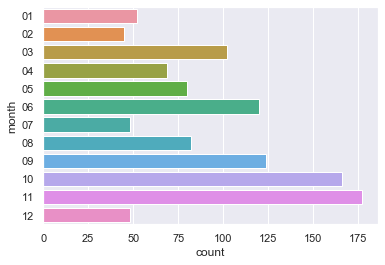

In [11]:
sns.set(style="darkgrid")
sns.countplot(y='month', data=df)

### Clean up the connection

Normally you would use a `with statement` similar to line 3.

In [12]:
conn.__exit__()